**Introduction:**
In this project, we conducted a data analysis using Python to uncover valuable insights about the shop's customer base. The analysis provided key findings that can inform strategic decision-making and improve customer satisfaction.

In [21]:
#importing the essential libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [22]:
# Read the data file
df = pd.read_csv("/kaggle/input/customers-dataset/Customers.csv")

In [23]:
# Explore the data
# Display the first few rows of the dataset
df.head(5)

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
0,1,Male,19,15000,39,Healthcare,1,4
1,2,Male,21,35000,81,Engineer,3,3
2,3,Female,20,86000,6,Engineer,1,1
3,4,Female,23,59000,77,Lawyer,0,2
4,5,Female,31,38000,40,Entertainment,2,6


In [24]:
# Data Cleaning
df_clean = df.copy()

In [25]:
# Generate summary statistics of the DataFrame
df.describe()

,CustomerID,Age,Annual Income ($),Spending Score (1-100),Work Experience,Family Size
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1000.500000,48.960000,110731.821500,50.962500,4.102500,3.768500
std,577.494589,28.429747,45739.536688,27.934661,3.922204,1.970749
min,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,500.750000,25.000000,74572.000000,28.000000,1.000000,2.000000
50%,1000.500000,48.000000,110045.000000,50.000000,3.000000,4.000000
75%,1500.250000,73.000000,149092.750000,75.000000,7.000000,5.000000
max,2000.000000,99.000000,189974.000000,100.000000,17.000000,9.000000


In [26]:
#prints the count of distinct values in multiple columns.
distinct_count = df[['Gender', 'Profession', 'Age', 'Spending Score (1-100)']].nunique()
print(distinct_count)

Gender                      2
Profession                  9
Age                       100
Spending Score (1-100)    101
dtype: int64


In [27]:
# Get information about the dataset
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              2000 non-null   int64 
 1   Gender                  2000 non-null   object
 2   Age                     2000 non-null   int64 
 3   Annual Income ($)       2000 non-null   int64 
 4   Spending Score (1-100)  2000 non-null   int64 
 5   Profession              1965 non-null   object
 6   Work Experience         2000 non-null   int64 
 7   Family Size             2000 non-null   int64 
dtypes: int64(6), object(2)
memory usage: 125.1+ KB


In [28]:
df_clean.isna().sum()

CustomerID                 0
Gender                     0
Age                        0
Annual Income ($)          0
Spending Score (1-100)     0
Profession                35
Work Experience            0
Family Size                0
dtype: int64

In [29]:
# Filling NaN values with "unknown" in the Profession column
df_clean["Profession"] = df_clean["Profession"].fillna("unknown")

In [30]:
# Counting the customers by gender
gender_counts = df_clean["Gender"].value_counts().reset_index()
gender_counts.columns = ["Gender", "Count"]


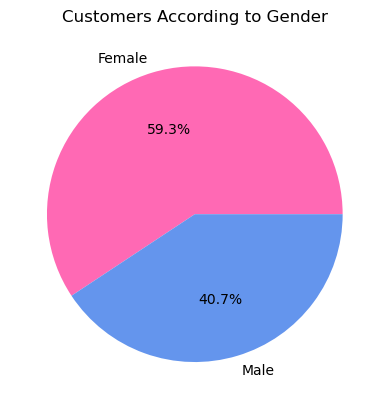

In [31]:
# Pie plot representing the percentage of customers
plt.pie(gender_counts["Count"], labels=gender_counts["Gender"], autopct='%1.1f%%', colors=["#FF69B4", "#6495ED"])
plt.title("Customers According to Gender")
plt.show()
import matplotlib.pyplot as plt

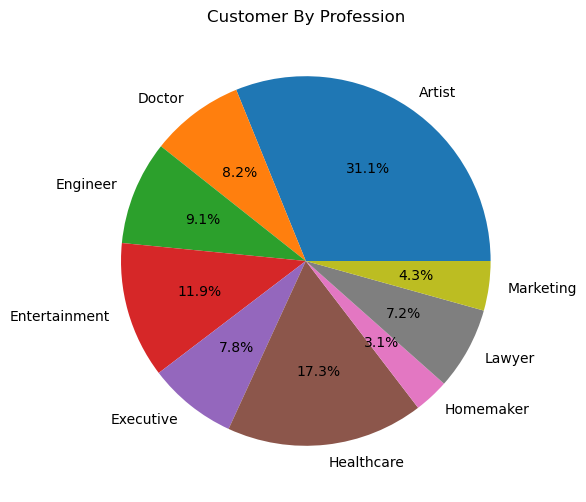

In [32]:
# Group the data by Profession and count the number of Customers in each Profession
department_count = df.groupby('Profession')['CustomerID'].count().reset_index()

# Creating a pie chart
plt.figure(figsize=(8, 6))
plt.pie(department_count['CustomerID'], labels=department_count['Profession'], autopct='%1.1f%%')
plt.title('Customer By Profession')
plt.show()

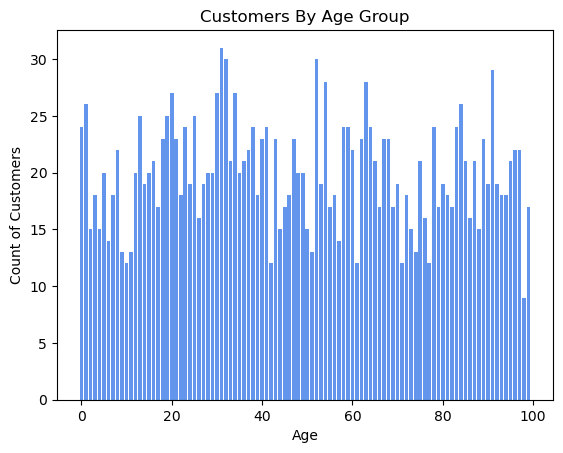

In [33]:
# Counting the number of customers by age group
age_counts = df_clean["Age"].value_counts().reset_index()
age_counts.columns = ["Age", "Count"]
plt.bar(age_counts["Age"], age_counts["Count"], color="#6495ED")
plt.xlabel("Age")
plt.ylabel("Count of Customers")
plt.title("Customers By Age Group")
plt.show()

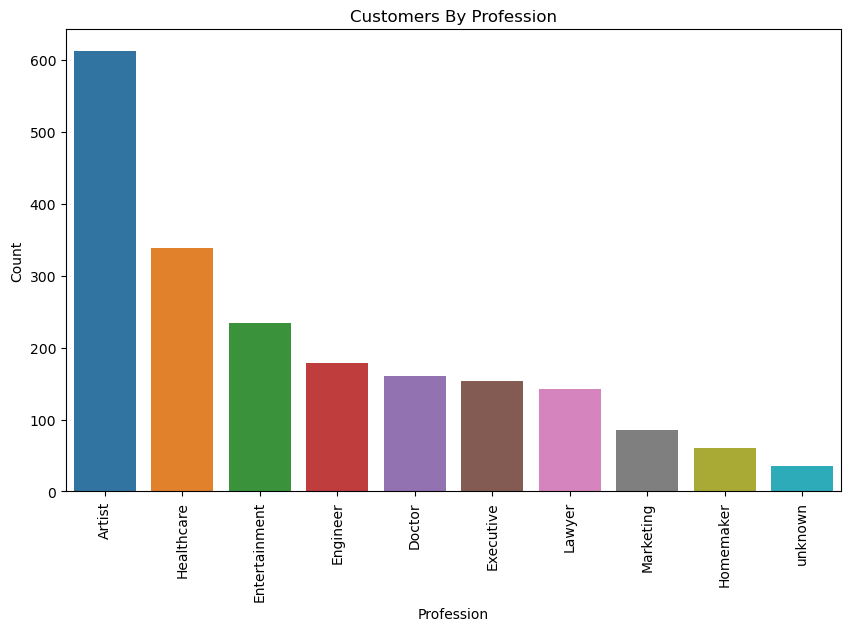

In [34]:
# Counting the number of customers by profession
profession_counts = df_clean["Profession"].value_counts().reset_index()
profession_counts.columns = ["Profession", "Count"]

plt.figure(figsize=(10, 6))
sns.barplot(data=profession_counts, x="Profession", y="Count")
plt.xticks(rotation=90)
plt.xlabel("Profession")
plt.ylabel("Count")
plt.title("Customers By Profession")
plt.show()

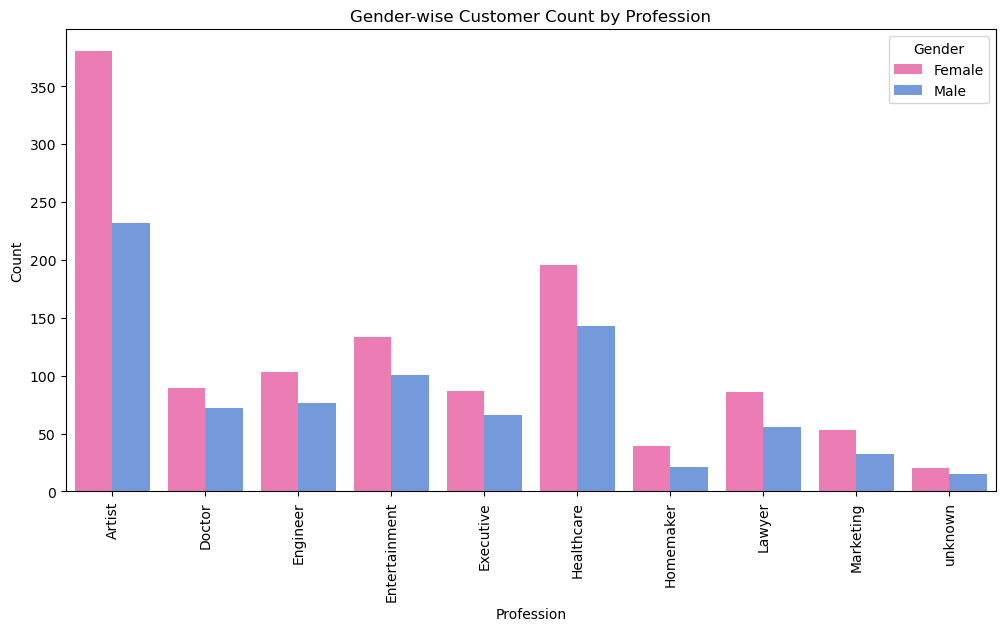

In [35]:
# Counting the number of males and females by profession
mf_counts = df_clean.groupby(["Gender", "Profession"]).size().reset_index(name="Count")

plt.figure(figsize=(12, 6))
sns.barplot(data=mf_counts, x="Profession", y="Count", hue="Gender", palette=["#FF69B4", "#6495ED"])
plt.xticks(rotation=90)
plt.xlabel("Profession")
plt.ylabel("Count")
plt.title("Gender-wise Customer Count by Profession")
plt.show()


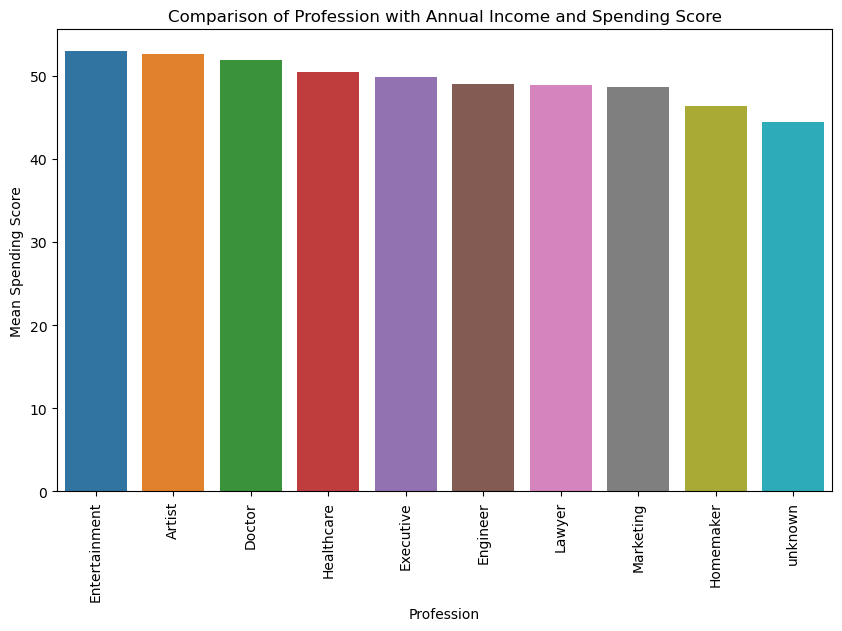

In [36]:
# Profession and their mean income and spending score
profession_mean = df_clean.groupby("Profession").agg({"Annual Income ($)": "mean", "Spending Score (1-100)": "mean"}).reset_index()
profession_mean = profession_mean.sort_values("Spending Score (1-100)", ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=profession_mean, x="Profession", y="Spending Score (1-100)")
plt.xticks(rotation=90)
plt.xlabel("Profession")
plt.ylabel("Mean Spending Score")
plt.title("Comparison of Profession with Annual Income and Spending Score")
plt.show()

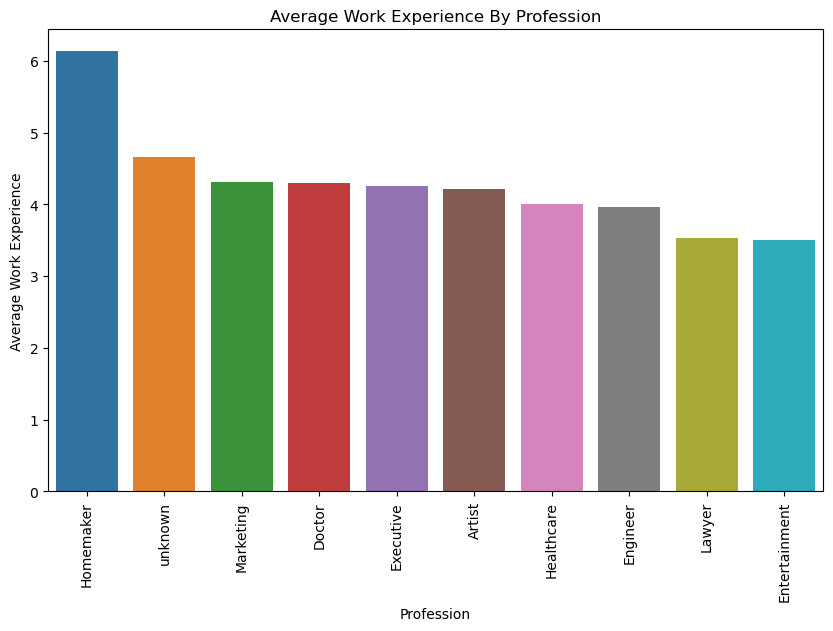

In [37]:
# Mean experience by profession
experience_mean = df_clean.groupby("Profession")["Work Experience"].mean().reset_index()
experience_mean = experience_mean.round(2).sort_values("Work Experience", ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=experience_mean, x="Profession", y="Work Experience")
plt.xticks(rotation=90)
plt.xlabel("Profession")
plt.ylabel("Average Work Experience")
plt.title("Average Work Experience By Profession")
plt.show()

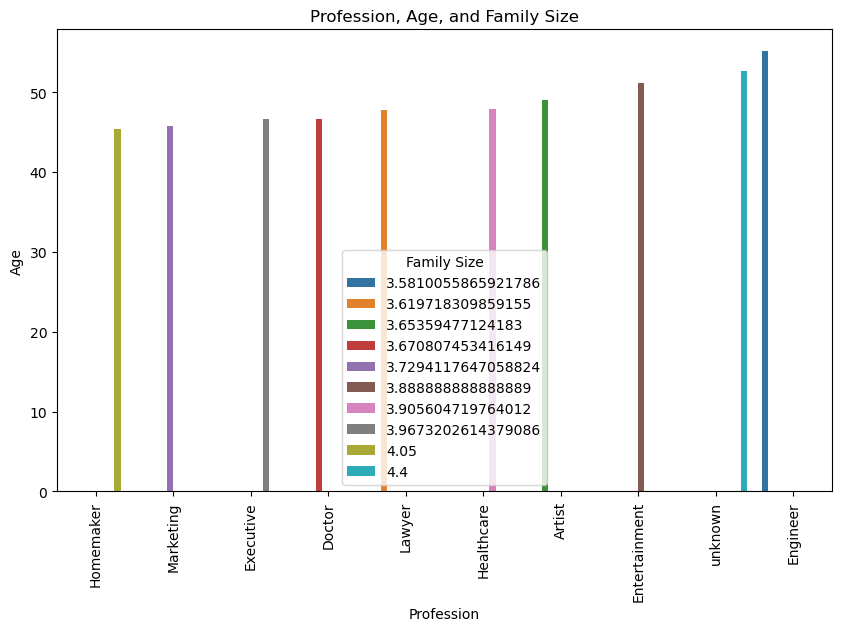

In [38]:
# Profession, age, and family size
age_family = df_clean.groupby("Profession").agg({"Age": "mean", "Family Size": "mean"}).reset_index()
age_family = age_family.sort_values("Age")

plt.figure(figsize=(10, 6))
sns.barplot(data=age_family, x="Profession", y="Age", hue="Family Size")
plt.xticks(rotation=90)
plt.xlabel("Profession")
plt.ylabel("Age")
plt.title("Profession, Age, and Family Size")
plt.show()

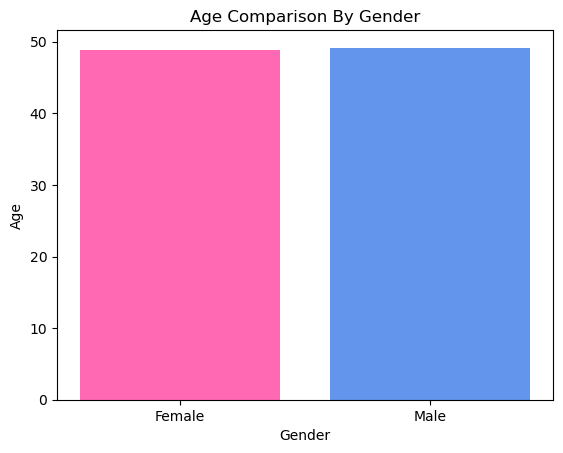

In [39]:
# Age and gender relation
age_gender = df_clean.groupby("Gender")["Age"].mean()

plt.bar(age_gender.index, age_gender.values, color=["#FF69B4", "#6495ED"])
plt.xlabel("Gender")
plt.ylabel("Age")
plt.title("Age Comparison By Gender")
plt.show()

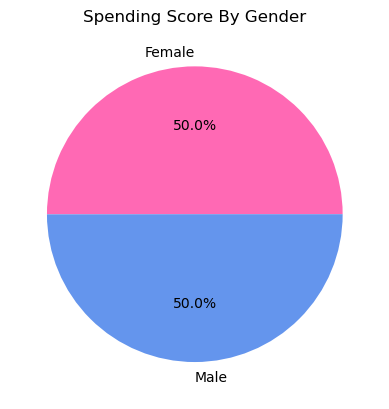

In [40]:
# Spending score according to gender
spending_gender = df_clean.groupby("Gender")["Spending Score (1-100)"].mean()

plt.pie(spending_gender, labels=spending_gender.index, autopct='%1.1f%%', colors=["#FF69B4", "#6495ED"])
plt.title("Spending Score By Gender")
plt.show()

**Insights**
* The shop has a larger customer base of females compared to males, indicating a potential opportunity to target and cater to the preferences and needs of female customers. 
* Artists are the most common profession among customers, suggesting the importance of stocking items that appeal to artists to increase sales. 
* The shop attracts customers from diverse age groups, with the majority falling within the age range of 30-39, highlighting a prime target demographic for marketing campaigns. 
* Customers in the entertainment field have the highest average spending scores, indicating the need to curate products and services that align with their preferences. 
* Both male and female customers demonstrate similar average spending scores, indicating a balanced customer base in terms of purchasing behavior. 
* The mean age of male and female customers is relatively similar, with a slight difference of 0.34 years, suggesting that age may not significantly impact customer preferences. 
* Homemakers have a significantly lower mean age compared to other professions, indicating the potential to tailor marketing strategies and product offerings specifically for this customer segment.**

**Conclusion**

In conclusion, this data analysis provides valuable insights for the shop to optimize its marketing strategies, stock appropriate products, and enhance customer satisfaction. By targeting female customers, recognizing the prevalence of artists, and considering the preferences of different age groups, the shop can make informed decisions to increase sales and improve overall customer experience.